## Image to Frames

In [1]:
%matplotlib inline
import io
import base64
from IPython.display import HTML
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import os
# video = io.open('test.avi', 'r+b').read()
FOLDER = "data/"
# cv2.imshow(video)

In [2]:
with open(FOLDER+"train1.txt") as f:
    content = f.readlines()
train = [x.strip().split(" ") for x in content] 
with open(FOLDER+"validation1.txt") as f:
    content = f.readlines()
validation = [x.strip().split(" ") for x in content] 

with open(FOLDER+"trainlist01.txt") as f:
    content = f.readlines()
all_data = [x.strip().split(" ") for x in content] 

with open(FOLDER+"train_test/sample.txt") as f:
    content = f.readlines()
sample = [x.strip().split(" ") for x in content] 


IOError: [Errno 2] No such file or directory: 'data/validation1.txt'

In [13]:
(sample)

NameError: name 'sample' is not defined

In [11]:
filelist = []
for video,label in all_data:
    category = video.split("/")[0]
    filename = video.split("/")[1].split(".avi")[0]    
    directory_name = FOLDER + "UCF101_images/" + category 

    if not os.path.exists(directory_name):
        os.makedirs(directory_name)

    video_file = FOLDER + "UCF101/" + video.split("/")[1]
    cap = cv2.VideoCapture(video_file)
    counter = 0
    while(cap.isOpened()):
        frameId = cap.get(1) #current frame number
        ret, frame = cap.read()
        if (ret != True):
            break
        if (frameId % 6) == 0:
            f_ = directory_name + "/" + filename + "_" + str(counter) + ".jpg"
            cv2.imwrite(f_, frame)
            counter += 1
    cap.release()
    filelist.append([category + "/" + filename, counter, label])


True
False
False
False


## Validation

In [3]:
np.savetxt('data/all_images1.txt', (filelist), fmt=['%s', '%s', '%s'], delimiter=' ')

NameError: name 'filelist' is not defined

In [65]:
counter = {i:0 for i in range(101)}
train_counter = {i:0 for i in range(100)}
val_counter = {i:0 for i in range(100)}

with open("data/all_images1.txt") as f:
    for line in f:
        label = int(line.split(" ")[2])
        counter[label-1] += 1        


In [66]:
trainlist = []
validlist = []
with open("data/all_images1.txt") as f:
    for line in f:
        label = int(line.split(" ")[2])
        if label != 37:
            if label > 37:
#                 print(label)
                label -= 1
            filename = line.split(" ")[0] + " " + line.split(" ")[1]
            train_or_val = np.random.rand()
            if train_or_val < 0.21:
                val_counter[label-1] += 1            
                validlist.append([filename, label-1])
            else:
                train_counter[label-1] += 1
                trainlist.append([filename, label-1])

In [78]:
np.savetxt('data/train1.txt', (trainlist), fmt=['%s', '%s'], delimiter=' ')
np.savetxt('data/val1.txt', (validlist), fmt=['%s', '%s'], delimiter=' ')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd2ae12a5d0>,
 <Container object of 100 artists>)

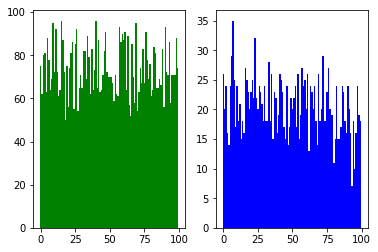

In [67]:
plt.subplot(1,2,1),plt.bar(train_counter.keys(), train_counter.values(), 1, color='g')
plt.subplot(1,2,2),plt.bar(val_counter.keys(), val_counter.values(), 1, color='b')


In [77]:
for i in train_counter:
    if i < 36:
        j = i - 1
        print (train_counter[i]+val_counter[i])/float(counter[i])
    if i > 35:
        j = i + 1
        print (train_counter[i]+val_counter[i])/float(counter[j])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [49]:
train_counter[35]

83